In [2]:
from google.colab import files
files.upload()


Saving loaddata .csv to loaddata .csv


{'loaddata .csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y

In [3]:
!ls

'loaddata .csv'   sample_data


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
df=pd.read_csv('loaddata .csv',encoding='latin')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
# summary of the dataset given to us

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
'''there are three datatypes in the dataset mainly object i.e npn numerical , integer and floating point'''

'''let us start the univariate analysis'''

df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

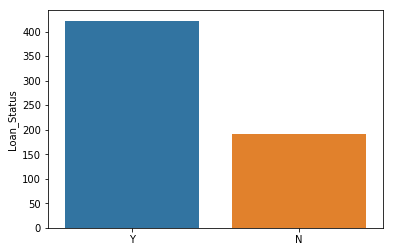

In [11]:
''' here we see that there is two types of values either yes or no ... so later can be converted into boolean 0 and 1'''

''' now let us bar plot the data'''

sns.barplot(y=df['Loan_Status'].value_counts(),x=['Y','N'])

In [12]:
''' here we see that for yes there is >400 values and and for no there are <200 values which makes the ratio 2:1'''
df['Loan_Status'].value_counts(normalize=True)*100
'''this gives the percentage of data for yes and no'''

'this gives the percentage of data for yes and no'

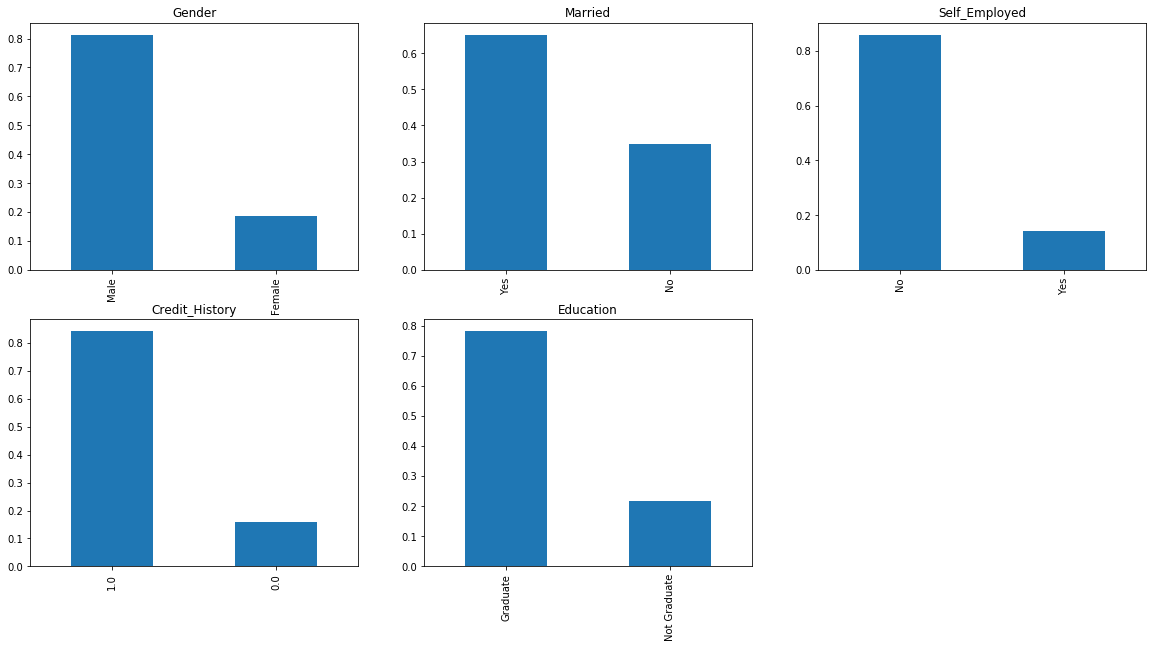

'the following figure shows the distribution of the categorical values'

In [13]:
''' now there are 5 categorical feature '''
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

'''the following figure shows the distribution of the categorical values'''

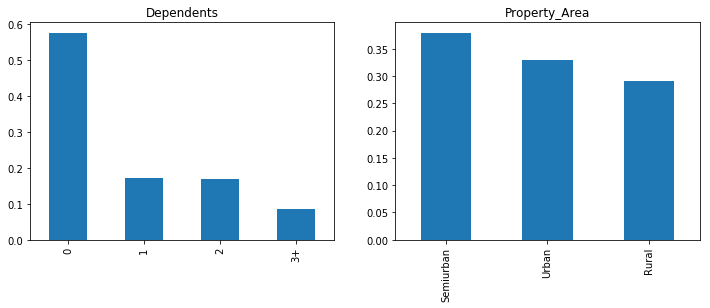

In [14]:
'''time to visualize and analyze the remaining categorical field'''

plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

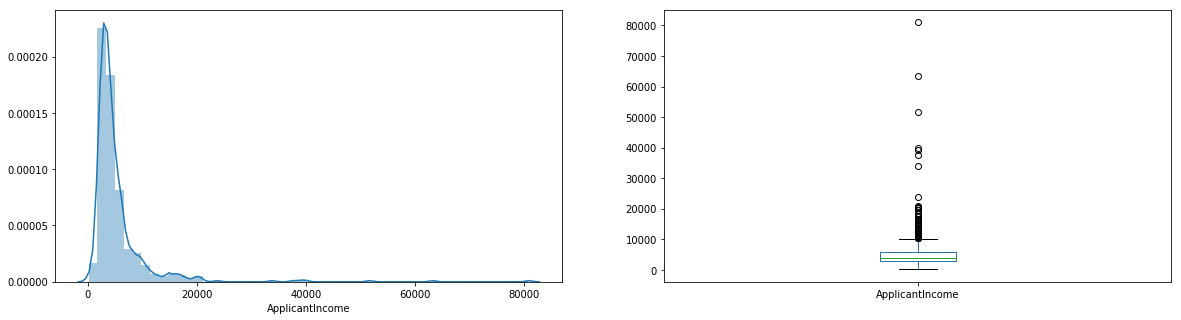

' the box plot shows clear notation of outliers ... ummm lets see what is the cause ... may be bank doesnot give loans \nto illeterate ... graduation nhi kia to credit card nhi milega'

In [15]:
'''now lets the distribution of the continuoud data
we will visualize the applicant income distribution and box plots'''

plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(20,5))

plt.show()

'''OMFG all the distribution on the left ... Jeez it is not fucking normal ... 
alas we have to make it normal for all other things to get clear ... lets see'''

''' the box plot shows clear notation of outliers ... ummm lets see what is the cause ... may be bank doesnot give loans 
to illeterate ... graduation nhi kia to credit card nhi milega'''

' see we found out the fucking cause behind the abnormal distribution of the applicant income xD.... its education \n... there are more applicant income in the graduated category '

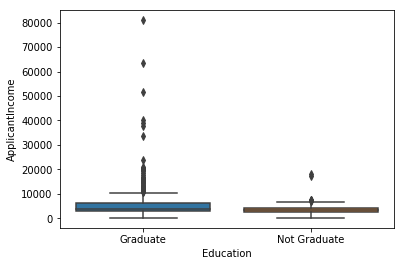

In [16]:
sns.boxplot(x=df['Education'],y=df['ApplicantIncome'],data=df)

''' see we found out the fucking cause behind the abnormal distribution of the applicant income xD.... its education 
... there are more applicant income in the graduated category '''

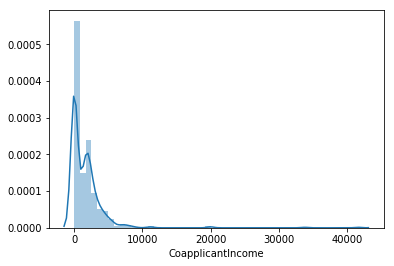

In [17]:
'''lets see the co applicant income'''

sns.distplot(df['CoapplicantIncome'])


'again left side shift ... may be because of eduaction again ... l.ets see'

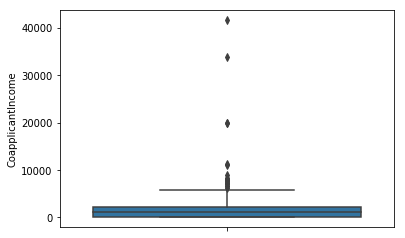

In [18]:
sns.boxplot(y=df['CoapplicantIncome'],data=df)

'''again left side shift ... may be because of eduaction again ... l.ets see'''

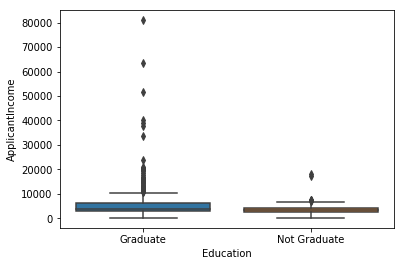

In [19]:
sns.boxplot(x=df['Education'],y=df['ApplicantIncome'],data=df)

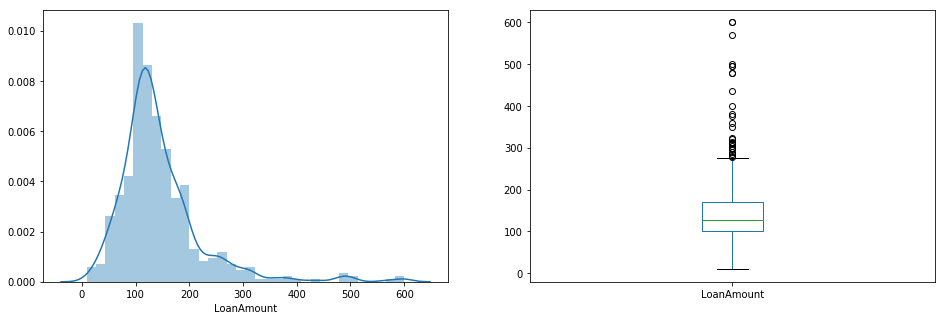

'Fairly normal .. we can say'

In [20]:
plt.subplot(121)
tdf=df.dropna()
sns.distplot(tdf['LoanAmount']);

plt.subplot(122)
tdf['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

'''Fairly normal .. we can say'''

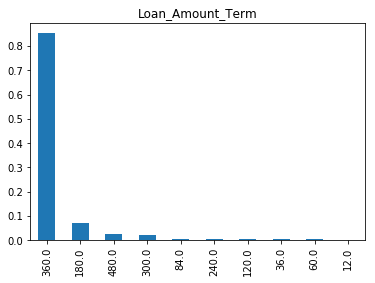

In [21]:
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


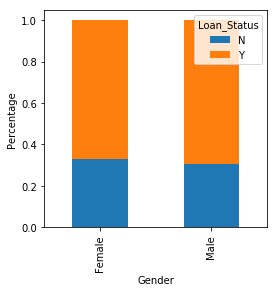

In [22]:
# bivariate analysis

print(pd.crosstab(df['Gender'],df['Loan_Status']))

Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


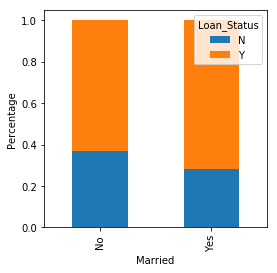

In [23]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


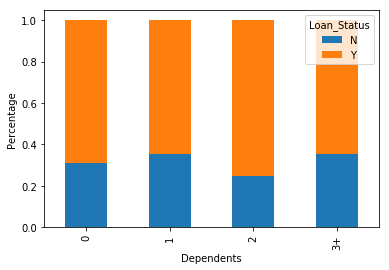

In [25]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


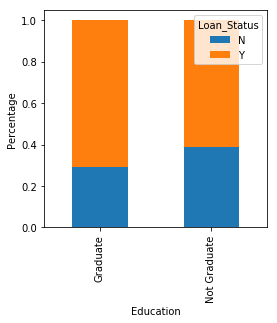

In [26]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


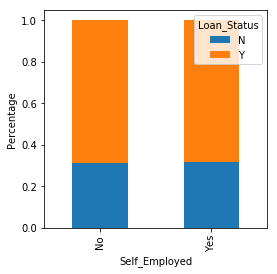

In [27]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


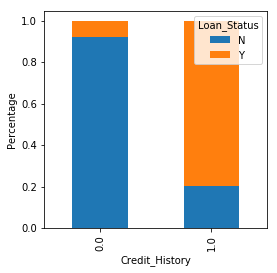

In [28]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


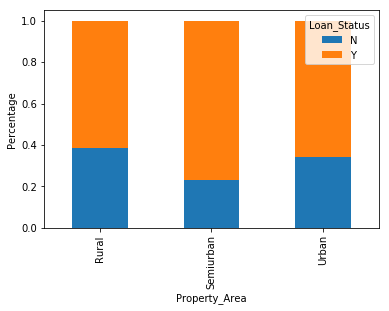

In [29]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


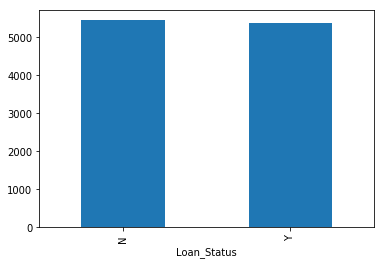

In [32]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()